####  Medical imaging reconstruction
In this problem, you will consider an example resembles medical imaging reconstruction in MRI. We
begin with a true image image of dimension 50 x 50 (i.e., there are 2500 pixels in total). Data is
cs.mat; you can plot it first. This image is truly sparse, in the sense that 2084 of its pixels have a value
of 0, while 416 pixels have a value of 1. You can think of this image as a toy version of an MRI image
that we are interested in collecting.  

Because of the nature of the machine that collects the MRI image, it takes a long time to measure each
pixel value individually, but it's faster to measure a linear combination of pixel values. We measure
n = 1300 linear combinations, with the weights in the linear combination being random, in fact,
independently distributed as N(0; 1). Because the machine is not perfect, we don't get to observe this
directly, but we observe a noisy version. These measurements are given by the entries of the vector  

y = Ax + n;  

where y = R1300, A = R1300x2500, and n x N(0; 25 x I1300) where In denotes the identity matrix of
size n x n. In this homework, you can generate the data y using this model.  
Now the question is: can we model y as a linear combination of the columns of x to recover some
coefficient vector that is close to the image? Roughly speaking, the answer is yes.  

Key points here: although the number of measurements n = 1300 is smaller than the dimension p
= 2500, the true image is sparse. Thus we can recover the sparse image using few measurements
exploiting its structure. This is the idea behind the field of compressed sensing.
The image recovery can be done using lasso

In [2]:
## Importing required libraries
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from sklearn.linear_model import  Lasso, Ridge
from sklearn.model_selection import cross_val_score


pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)

### (a) Using lasso to recover the image and selecting lambda using 10-fold cross-validation.

In [3]:
np.random.seed(0)

rawmat = scipy.io.loadmat('data/cs.mat')
img = rawmat["img"].astype(np.float32)

#### Plotting the Original Image

Text(0.5, 1.0, 'Original Image')

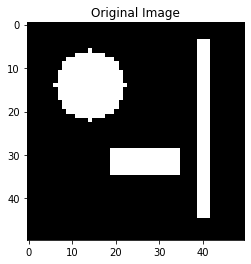

In [4]:
# #### plot the original image
plt.imshow(img, cmap='gray')
plt.title('Original Image')

#### Following the steps to generate a normal gaussian matrix

In [6]:
# ### generate a random Gaussian matrix
A = np.random.randn(1300, 2500)
x = img.reshape(2500)
n = np.random.randn(1300)*5 # noise
y = A @ x + n # observation

#### Getting the best lambda value for Lasso

In [7]:
alpha_batch = np.linspace(1e-2,1e-1, 101)
N = len(alpha_batch)
mse_lasso = np.zeros(N)

for ii in range(N):
    alpha = alpha_batch[ii]
    mdl_lasso = Lasso(alpha = alpha,tol=1e-2)
    mse_lasso[ii]= - cross_val_score(mdl_lasso, A, y, cv=10, scoring='neg_mean_squared_error').mean()

lasso_idx = np.where(mse_lasso == mse_lasso.min())

#### Plotting the Cross-Validation curve for Lasso

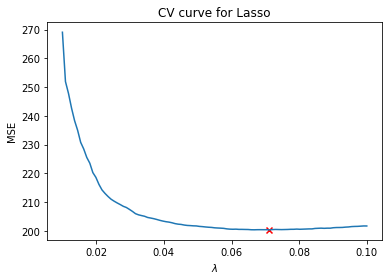

In [8]:
plt.figure()
plt.plot(alpha_batch, mse_lasso)
plt.scatter([alpha_batch[lasso_idx]],[mse_lasso[lasso_idx]],c='r',marker='x')
plt.title('CV curve for Lasso')
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.show()

#### Reconstructing the image with Lasso coefficients

Text(0.5, 1.0, 'recovered image with Lasso')

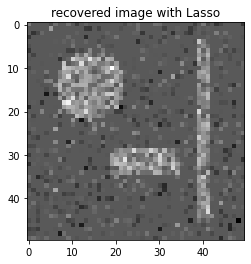

In [9]:
alpha0_lasso = alpha_batch[lasso_idx]
xrecon_lasso = Lasso(alpha=alpha0_lasso).fit(A, y).coef_
plt.imshow(xrecon_lasso.reshape(50, 50), cmap='gray')
plt.title('recovered image with Lasso')

#### Identifying the reconstruction error

In [10]:
# ### reconstruction error
mse_wrt_true_lasso = np.mean((xrecon_lasso - x)**2)
print('reconstruction error with Lasso :{0:.4f}'.format(mse_wrt_true_lasso))

reconstruction error with Lasso :0.0631


#### We do see that there is a decent reconstruction of the image with a low error rate of 6% after regularization.

### (b) Using Ridge to recover the image and selecting lambda using 10-fold cross-validation.

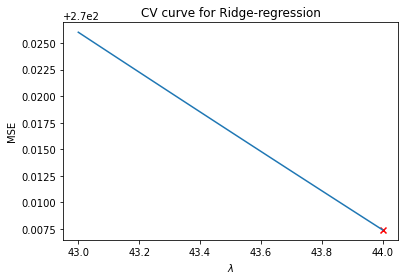

In [11]:
# #### Ridge-regression #####################################################
alpha_batch = np.linspace(43,44, 101)
N = len(alpha_batch)
mse_ridge = np.zeros(N)

for ii in range(N):
    alpha = alpha_batch[ii]
    
    mdl_ridge = Ridge(alpha=alpha, tol=1e-2)
    mse_ridge[ii]= - cross_val_score(mdl_ridge, A, y, cv=10, scoring='neg_mean_squared_error').mean()


ridge_idx = np.where(mse_ridge == mse_ridge.min())

plt.figure()
plt.plot(alpha_batch, mse_ridge)
plt.scatter([alpha_batch[ridge_idx]],[mse_ridge[ridge_idx]],c='r',marker='x')
plt.title('CV curve for Ridge-regression')
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.show()

#### Reconstructing image with Ridge coefficients

Text(0.5, 1.0, 'recovered image with Ridge-regression')

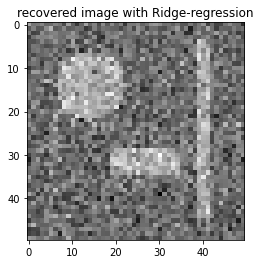

In [12]:
alpha0_ridge = alpha_batch[ridge_idx]
xrecon_ridge = Ridge(alpha=alpha0_ridge).fit(A, y).coef_
plt.imshow(xrecon_ridge.reshape(50, 50), cmap='gray')
plt.title('recovered image with Ridge-regression')

#### Reconstruction error calculation

In [13]:
mse_wrt_true_ridge = np.mean((xrecon_ridge - x)**2)
print('reconstruction error with Ridge :{0:.4f}'.format(mse_wrt_true_ridge))

reconstruction error with Ridge :0.0875


#### Ridge has a slightly higher reconstruction error rate than LASSO.